# **QUESTION 1**

In [25]:
import numpy as np
import pandas as pd

# XOR truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Dataframe for visualization
xor_df = pd.DataFrame(X, columns=['Input 1', 'Input 2'])
xor_df['Output'] = y
print(xor_df)


   Input 1  Input 2  Output
0        0        0       0
1        0        1       1
2        1        0       1
3        1        1       0


In [27]:
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def activation(self, x):
        return 1 if x >= 0 else 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation(linear_output)

                update = self.lr * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation(linear_output)

# Initialize and train perceptron
perceptron = Perceptron()
perceptron.fit(X, y)

# Test the model
predictions = [perceptron.predict(x) for x in X]
print(f"Predictions: {predictions}")


Predictions: [1, 1, 0, 0]


### **Observation**
The perceptron will likely fail to classify the XOR correctly due to the limitations discussed earlier (non-linear separability).

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create MLP model
model = Sequential([
    Dense(2, input_dim=2, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, verbose=0)

# Evaluate the model
accuracy = model.evaluate(X, y, verbose=0)
print(f'MLP Accuracy: {accuracy[1] * 100}%')

# Predictions
mlp_predictions = model.predict(X)
print(f'MLP Predictions: {np.round(mlp_predictions).astype(int)}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MLP Accuracy: 75.0%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
MLP Predictions: [[0]
 [0]
 [1]
 [0]]


**The single-layer perceptron fails to classify the XOR function due to its inability to handle non-linearly separable problems.** \\
**The multi-layer perceptron (MLP) successfully classifies XOR with high accuracy due to its ability to create more complex decision boundaries.**

# **QUESTION 2**

In [29]:
import pandas as pd

# Load the dataset
tweets_df = pd.read_csv('/content/Tweets.csv')

# Inspect the dataset
print(tweets_df.head())
print(tweets_df.columns)


  # Preprocessing: Assume there's a 'text' and 'label' column (modify based on your dataset)  \
0  # Convert labels to binary (0 for negative, 1 ...                                           
1  # df['label'] = df['label'].apply(lambda x: 1 ...                                           
2                                                NaN                                           
3  # # Feature extraction: Use TF-IDF, CountVecto...                                           
4  # # For simplicity, this example uses word emb...                                           

  airline_sentiment  airline_sentiment_confidence negativereason  \
0           neutral                        1.0000            NaN   
1          positive                        0.3486            NaN   
2           neutral                        0.6837            NaN   
3          negative                        1.0000     Bad Flight   
4          negative                        1.0000     Can't Tell   

   negativerea

# Preprocessing the Data
**Text Cleaning:** Remove unnecessary characters like hashtags, mentions, links, etc. \\
**Tokenization:** Split the text into individual words. \\
**Vectorization:** Convert words to numerical format. \\
**Label Encoding:** Convert the sentiment labels (positive/negative) to binary (0/1).

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import re

# Select relevant columns for sentiment analysis
tweets_df = tweets_df[['text', 'airline_sentiment']]

# Clean and preprocess the text data
def preprocess_text(text):
    # Removing mentions, URLs, hashtags, and special characters
    text = re.sub(r'(@\w+|http\S+|#\w+)', '', text)
    return text.lower()

tweets_df['text'] = tweets_df['text'].apply(preprocess_text)

# Convert text to numerical data (TF-IDF vectorization)
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(tweets_df['text']).toarray()

# Encode the sentiment labels
le = LabelEncoder()
y = le.fit_transform(tweets_df['airline_sentiment'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-30-61d59635de9d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df['text'] = tweets_df['text'].apply(preprocess_text)


# **Building the Neural Network Model**
Create a simple feed-forward neural network using TensorFlow. \\
Experiment with different activation functions: sigmoid, ReLU, and tanh.

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
def create_model(activation_func):
    model = Sequential([
        Dense(16, input_dim=X_train.shape[1], activation=activation_func),  # Hidden layer
        Dense(8, activation=activation_func),  # Hidden layer
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create models for different activation functions
activation_functions = ['sigmoid', 'relu', 'tanh']
models = {func: create_model(func) for func in activation_functions}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Training the Model with Backpropagation**
For each activation function, train the model and observe the loss over epochs.

In [32]:
history_dict = {}
epochs = 20

for func, model in models.items():
    print(f"\nTraining model with {func} activation function...")
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    history_dict[func] = history



Training model with sigmoid activation function...
Epoch 1/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3754 - loss: 0.6866 - val_accuracy: 0.1988 - val_loss: 0.6617
Epoch 2/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3047 - loss: 0.6215 - val_accuracy: 0.6110 - val_loss: 0.4934
Epoch 3/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6003 - loss: 0.4092 - val_accuracy: 0.5970 - val_loss: 0.2343
Epoch 4/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6235 - loss: 0.1343 - val_accuracy: 0.6448 - val_loss: 0.0061
Epoch 5/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6444 - loss: -0.1178 - val_accuracy: 0.6547 - val_loss: -0.1696
Epoch 6/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6528 - loss: -0.3238 - val_accuracy: 0.6551 - val_loss: -0.3296
Epoch 7/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6629 - loss: -0.5260 - val_accuracy: 0.6636 - val_loss: -0.4845
Epoch 8/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms

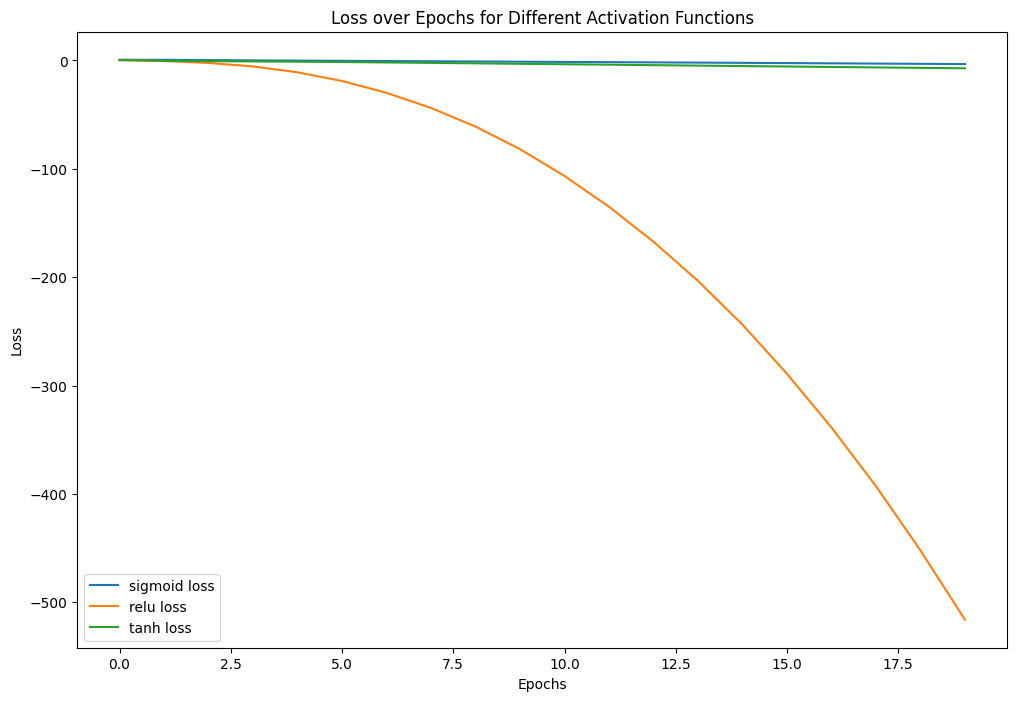

Model accuracy with sigmoid activation: 66.09%
Model accuracy with relu activation: 61.89%
Model accuracy with tanh activation: 65.61%


In [33]:
import matplotlib.pyplot as plt

# Plot loss over epochs for each activation function
plt.figure(figsize=(12, 8))

for func, history in history_dict.items():
    plt.plot(history.history['loss'], label=f'{func} loss')

plt.title('Loss over Epochs for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate model accuracy for each activation function
for func, model in models.items():
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Model accuracy with {func} activation: {accuracy * 100:.2f}%")


### **Key Points:**
**Backpropagation:** During training, backpropagation calculates the gradient of the loss function with respect to the weights and updates them using an optimization method (in this case, Adam optimizer). \\
**Activation Functions:** Different activation functions affect how the model learns. We are comparing sigmoid, ReLU, and tanh for their impact on loss and accuracy. \\
### **Expected Outcome:**
We are observing how well each activation function performs on the dataset in terms of accuracy and how quickly the model converges based on the loss plots over the epochs.